In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
subject_name = "Lotta"


In [3]:
"""Baseline analysis"""
data_baseline_1 = pd.read_csv('error_angles_baseline_trial_{}_{}.csv'.format(1, subject_name))
data_baseline_2 = pd.read_csv('error_angles_baseline_trial_{}_{}.csv'.format(2, subject_name))


FileNotFoundError: [Errno 2] No such file or directory: 'error_angles_baseline_trial_1_Lotta.csv'

In [ ]:
a1, a2, a3, a4, a5, a6 = 0, 40, 80, 120, 160, 200
collect_attempts = [a2, a3, a4, a5, a6]
string_attempts = ['No Perturbation', 'Sudden Perturbation', 'No Pert.', 'Sudden Pert.', 'No Pert.']
subject_name = "Lotta"
attempts = 200

g0 = sns.scatterplot(data = data_baseline_1, x = 'attempts', y = 'error_angles') 
g0 = sns.lineplot(data = data_baseline_1, x = 'attempts', y = 'error_angles')

g0 = sns.scatterplot(data = data_baseline_2, x = 'attempts', y = 'error_angles', hue="r") 
g0 = sns.lineplot(data = data_baseline_2, x = 'attempts', y = 'error_angles', hue="r")

""" Add vertical lines to show the different pertubation_types."""
g0.vlines(np.array(collect_attempts) - 0.5, ymin = -45, ymax = 40, color = 'red', alpha = 0.5)
""" Add labels to the vertical lines."""
for i in range(len(collect_attempts)):
    g0.text(collect_attempts[i] - 7, -45, string_attempts[i], rotation = 90, color = 'red', alpha = 0.5)
g0.set(xlabel='attempts', ylabel='error_angles', title = 'Error_angles over attempts')

g0.figure.savefig("HW2/baseline_error_angles_"+ subject_name + ".png")


In [4]:
""" Load the data from the csv file and perform the analysis."""
df = pd.read_csv('error_angles_{}.csv'.format(subject_name))
df.head(5)

,subject_name,target_mode,perturbation_type,trial_number,trial_name,target_pos,changed_angels,error_angles
0,Lotta,sequence,sudden,1,No Perturbation,-1.22173,20,0.059842
1,Lotta,sequence,sudden,2,No Perturbation,-1.22173,20,-0.019156
2,Lotta,sequence,sudden,3,No Perturbation,-1.22173,20,-0.069428
3,Lotta,sequence,sudden,4,No Perturbation,-1.22173,20,-0.036527
4,Lotta,sequence,sudden,5,No Perturbation,-1.22173,20,0.150281


In [5]:
""" Calulate the motor varibility or the std for each baseline and each trial."""
MV = df[df['trial_name'] == 'No Perturbation']['error_angles'].std()
print(MV)

""" Create an array of the error angles for each trial."""
error_angels_arr = np.array(np.abs(df[df['trial_name'] != 'No Perturbation']['error_angles']))

""" Calculate the adaptation rate for each trial."""
""" Choose for each trial the maximum between the error angle and the motor variability."""
adaptation_rate = np.where(MV / error_angels_arr > 1, 1, MV / error_angels_arr) * 100

trials_number_adapt = df[df['trial_name'] != 'No Perturbation'].trial_number
hue_trials = df[df['trial_name'] != 'No Perturbation'].changed_angels

0.08053454928927269


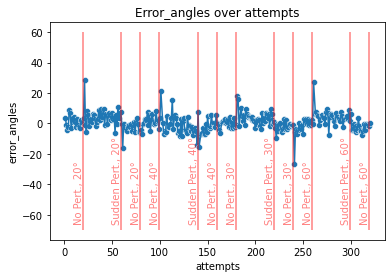

In [20]:
"""Plot the basic error angles over trial like last week"""

a1, a2, a3, a4, a5, a6, a7, a8, a9, a10,a11,a12, a13 = 0, 20, 60, 80,100, 140, 160,180, 220, 240,260, 300, 320
collect_attempts = [a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13]
string_attempts = ['No Pert., 20°', 'Sudden Pert., 20°', 'No Pert., 20°',
                   'No Pert., 40°', 'Sudden Pert., 40°', 'No Pert., 40°',
                   'No Pert., 30°', 'Sudden Pert., 30°', 'No Pert., 30°',
                   'No Pert., 60°', 'Sudden Pert., 60°', 'No Pert., 60°']

attempts = 320


data = pd.read_csv("error_angles_"+ subject_name + ".csv")
data["error_angles"] = np.degrees(data["error_angles"])
g0 = sns.scatterplot(data = data, x = 'trial_number', y = 'error_angles') 
g0 = sns.lineplot(data = data, x = 'trial_number', y = 'error_angles')
""" Add vertical lines to show the different pertubation_types."""
g0.vlines(np.array(collect_attempts) - 0.5, ymin = -70, ymax = 60, color = 'red', alpha = 0.5)
""" Add labels to the vertical lines."""
for i in range(len(collect_attempts)):
    g0.text(collect_attempts[i] - 10, -65, string_attempts[i], rotation = 90, color = 'red', alpha = 0.5)
g0.set(xlabel='attempts', ylabel='error_angles', title = 'Error_angles over attempts')

g0.figure.savefig("error_angles_"+ subject_name + ".png")

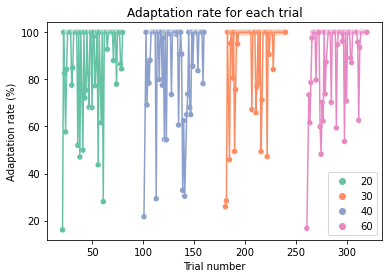

In [21]:
""" Plot the adaptation rate but not for the baseline."""
g0 = sns.scatterplot(x= trials_number_adapt, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
g0 = sns.lineplot(x= trials_number_adapt, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g0.get_legend_handles_labels()
g0.legend(handles=handles[:4], labels=labels[:4])

g0.set(xlabel='Trial number', ylabel='Adaptation rate (%)', title = 'Adaptation rate for each trial')


g0.figure.savefig("error_angles_adaptation"+ str(df.subject_name.unique()[0]) + ".svg")
g0.figure.savefig("error_angles_adaptation"+ str(df.subject_name.unique()[0]) + ".png")

In [22]:
""" Create a dataframe with the adaptation rate and the trial_number."""
trials_number_no_pert = df[df['trial_name'] == 'No Perturbation'].trial_number
no_pert_error = df[df['trial_name'] == 'No Perturbation'].error_angles * 100

MV_error = 100 * MV / np.abs(no_pert_error)
hue_no_pert = df[df['trial_name'] == 'No Perturbation'].changed_angels


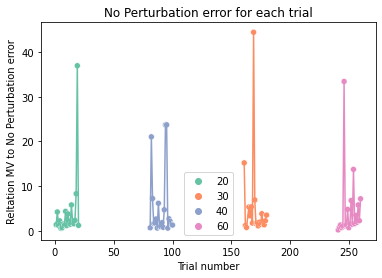

In [23]:
""" Plot the No Perturbation error."""

g1 = sns.scatterplot(x= trials_number_no_pert, y= MV_error, hue = hue_no_pert,  palette = 'Set2')

g1 = sns.lineplot(x= trials_number_no_pert, y= MV_error, hue = hue_no_pert,  palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g1.get_legend_handles_labels()
g1.legend(handles=handles[:4], labels=labels[:4])

g1.set(xlabel='Trial number', ylabel='Reltation MV to No Perturbation error', title = 'No Perturbation error for each trial')

g1.figure.savefig("no_pert_error_"+ str(df.subject_name.unique()[0]) + ".svg")
g1.figure.savefig("no_pert_error_"+ str(df.subject_name.unique()[0]) + ".png")

In [24]:
""" Quantify the aftereffect."""


trials_numer_aftereffect = df[df['trial_name'] == 'Aftereffect'].trial_number

""" Create an array of the error angles for each trial."""
error_angels_arr = np.array(np.abs(df[df['trial_name'] == 'Aftereffect']['error_angles']))
hue_trials = df[df['trial_name'] == 'Aftereffect'].changed_angels

""" Calculate the adaptation rate for each trial."""
""" Choose for each trial the maximum between the error angle and the motor variability."""
adaptation_rate = np.where(MV / error_angels_arr > 1, 1, MV / error_angels_arr) * 100

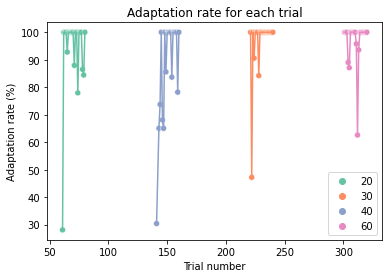

In [25]:
""" Plot the adaptation rate but not for No Perturbation."""
g0 = sns.scatterplot(x= trials_numer_aftereffect, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
g0 = sns.lineplot(x= trials_numer_aftereffect, y= adaptation_rate, hue = hue_trials, palette = 'Set2')
""" Make only one legend for the two plots."""
handles, labels = g0.get_legend_handles_labels()
g0.legend(handles=handles[:4], labels=labels[:4])

g0.set(xlabel='Trial number', ylabel='Adaptation rate (%)', title = 'Adaptation rate for each trial')


g0.figure.savefig("error_angles_aftereffect"+ str(df.subject_name.unique()[0]) + ".svg")
g0.figure.savefig("error_angles_aftereffect"+ str(df.subject_name.unique()[0]) + ".png")